#1. Análise de Inadimplência de Créditos
Este projeto tem como objetivo analisar os dados de créditos concedidos a clientes para identificar padrões relacionados à inadimplência. O foco está em compreender os fatores que contribuem para o risco de não pagamento, ajudando instituições financeiras a melhorar a concessão de crédito.

A inadimplência em créditos representa um desafio significativo para instituições financeiras, impactando a saúde financeira das operações. Este projeto analisa um conjunto de dados de crédito para identificar padrões e fatores que influenciam a probabilidade de inadimplência. O objetivo é fornecer insights que ajudem a melhorar a gestão de riscos e as estratégias de concessão de crédito.


#2. Código de importação de bibliotecas


In [38]:
import pandas as pd  # Manipulação de dados
import matplotlib.pyplot as plt  # Criação de gráficos
import seaborn as sns  # Visualizações avançadas


#3. Código de download/carregamento/geração de dados

Os dados foram extraídos de uma base pública disponível em [https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv].

Dados

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Exploraremos as principais variáveis para entender padrões e verificar a qualidade dos dados.

In [40]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


In [41]:
df.shape

(10127, 16)

In [42]:
 df[df['default'] == 0].shape

(8500, 16)

In [43]:
df[df['default'] == 1].shape

(1627, 16)

In [44]:
qtd_total, _ = df.shape
qtd_0, _ = df[df['default'] == 0].shape
qtd_1, _ = df[df['default'] == 1].shape

In [45]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_0 / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_1 / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


In [46]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [47]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


In [48]:
df.select_dtypes(include='object').describe().transpose()\
    .round(2)\
    .rename(columns={'count': 'count', 'unique': 'unique', 'top': 'top', 'freq': 'freq'})\
    .style.set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#f4f4f9'), ('color', '#333')]},
         {'selector': 'tbody td', 'props': [('padding', '10px'), ('text-align', 'center')]},
         {'selector': 'table', 'props': [('width', '100%'), ('border-collapse', 'collapse')]}]
    )


,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [49]:
df.select_dtypes(include='number').describe().transpose()\
    .style.format("{:.2f}")\
    .set_table_styles(
        [{'selector': 'thead th', 'props': [('background-color', '#f4f4f9'), ('color', '#333')]},
         {'selector': 'tbody td', 'props': [('padding', '10px'), ('text-align', 'center')]},
         {'selector': 'table', 'props': [('width', '100%'), ('border-collapse', 'collapse')]}]
    )


,count,mean,std,min,25%,50%,75%,max
id,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
default,10127.00,0.16,0.37,0.00,0.00,0.00,0.00,1.00
idade,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
dependentes,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
meses_de_relacionamento,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
qtd_produtos,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
iteracoes_12m,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
meses_inativo_12m,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
qtd_transacoes_12m,10127.00,64.86,23.47,10.00,45.00,67.00,81.00,139.00


In [50]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


#4. Etapa de limpeza e transformação

Nesta etapa, lidaremos com valores ausentes e converteremos variáveis categóricas em numéricas para análises futuras.

In [51]:
df.isna().any()

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,True
estado_civil,True
salario_anual,True
tipo_cartao,False
meses_de_relacionamento,False


In [52]:
df.isna().sum()

,0
id,0
default,0
idade,0
sexo,0
dependentes,0
escolaridade,1519
estado_civil,749
salario_anual,1112
tipo_cartao,0
meses_de_relacionamento,0


In [53]:
import pandas as pd

def stats_dados_faltantes(df: pd.DataFrame) -> pd.DataFrame:

    total = df.shape[0]
    stats_dados_faltantes = {
        col: {'quantidade': df[col].isna().sum(),
              'porcentagem': round(100 * df[col].isna().sum() / total, 2)}
        for col in df.columns if df[col].isna().any()
    }
    return pd.DataFrame(stats_dados_faltantes).T.rename_axis('Coluna').reset_index()


In [54]:
stats_dados_faltantes(df=df)

,Coluna,quantidade,porcentagem
0,escolaridade,1519.0,15.00
1,estado_civil,749.0,7.40
2,salario_anual,1112.0,10.98


In [55]:
stats_dados_faltantes(df=df[df['default'] == 0])

,Coluna,quantidade,porcentagem
0,escolaridade,1263.0,14.86
1,estado_civil,620.0,7.29
2,salario_anual,925.0,10.88


In [56]:
stats_dados_faltantes(df=df[df['default'] == 1 ])

,Coluna,quantidade,porcentagem
0,escolaridade,256.0,15.73
1,estado_civil,129.0,7.93
2,salario_anual,187.0,11.49


In [57]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

,0
limite_credito,object
valor_transacoes_12m,object


In [58]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [59]:
fn = lambda x: float(x.replace('.', '').replace(',','.'))


In [60]:
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

In [61]:
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


In [62]:
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [63]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


In [64]:
df.dropna(inplace=True)

In [65]:
df.shape

(7081, 16)

In [66]:
df[df['default'] == 0].shape

(5968, 16)

In [67]:
df[df['default'] == 1].shape

(1113, 16)

In [68]:
qtd_total_novo, _ = df.shape
qtd_0_novo, _ = df[df['default'] ==0].shape
qtd_1_novo, _ = df[df['default'] ==1].shape

In [69]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_0 / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_0_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_1 / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_1_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


In [70]:
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
sexo,7081,2,M,3706
escolaridade,7081,5,mestrado,2591
estado_civil,7081,3,casado,3564
salario_anual,7081,5,menos que $40K,2792
tipo_cartao,7081,4,blue,6598


In [71]:
sns.set_theme(style='darkgrid')

In [72]:
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default']== 1]

#5. Etapa de análise (com visualizações)

A análise se concentrará na identificação de sazonalidade nas vendas e no desempenho de categorias de produtos.



Nesta etapa, serão realizadas análises detalhadas para compreender os padrões associados à inadimplência. Gráficos e tabelas serão utilizados para visualizar relações entre variáveis, como renda, idade, histórico de crédito e status de pagamento. O objetivo é identificar tendências ou fatores que possam influenciar a probabilidade de inadimplência com:



Visualização da distribuição de clientes inadimplentes e adimplentes.

Gráficos de barras para analisar a correlação entre variáveis categóricas e numéricas e inadimplência.

Gráfico de dispersão para analisar a correlação entre a quantidade de transações no último ano, valor das transações no último ano e inadimplência.

Gráficoc de dispersão para analisar a correlação limite de crédito e interações.

Gráfico de diagrama de caixas para analisar a correlação entre o número de dependentes com a quantidade de transações no último ano e inadiplência.



<ipython-input-73-5b8df5582461>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
<ipython-input-73-5b8df5582461>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
<ipython-input-73-5b8df5582461>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)


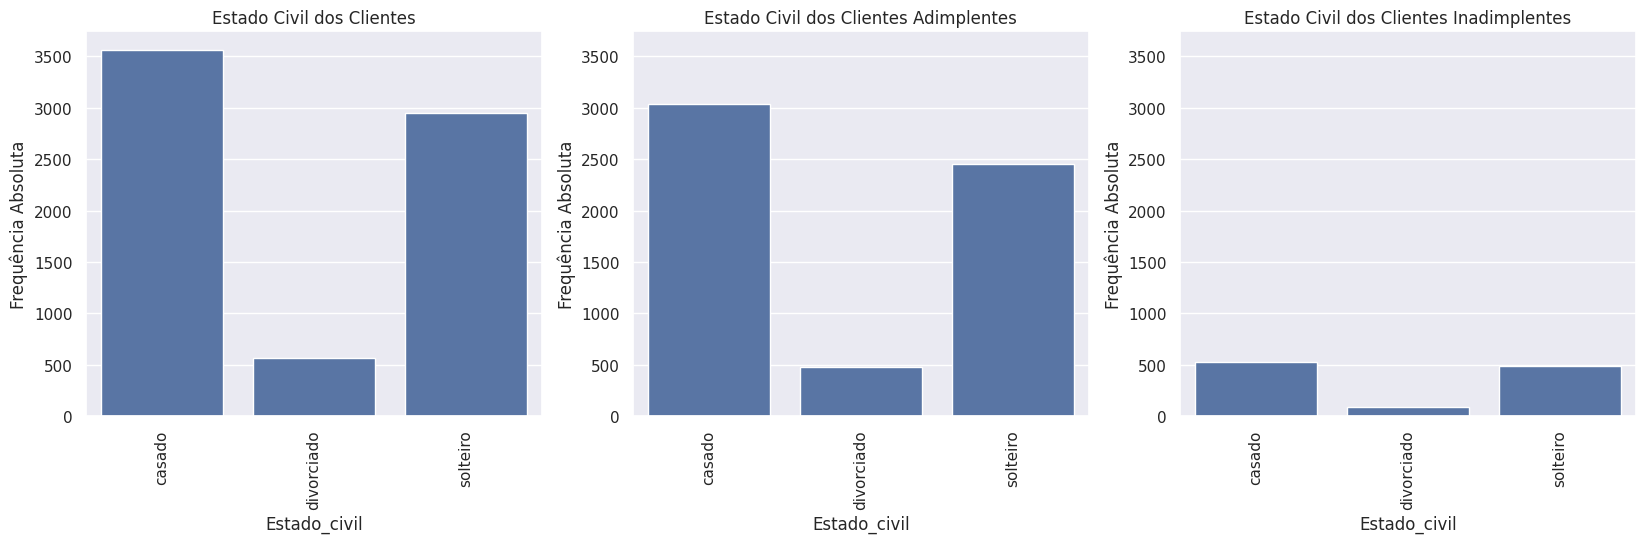

In [73]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil dos Clientes Adimplentes', 'Estado Civil dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
    df_to_plot = dataframe[coluna].value_counts().to_frame().reset_index()

    df_to_plot.rename(columns={'index': coluna, df_to_plot.columns[1]: 'frequencia_absoluta'}, inplace=True)
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

In [74]:
#solteiros tem risco levemente maior de inadimplência do que casados.

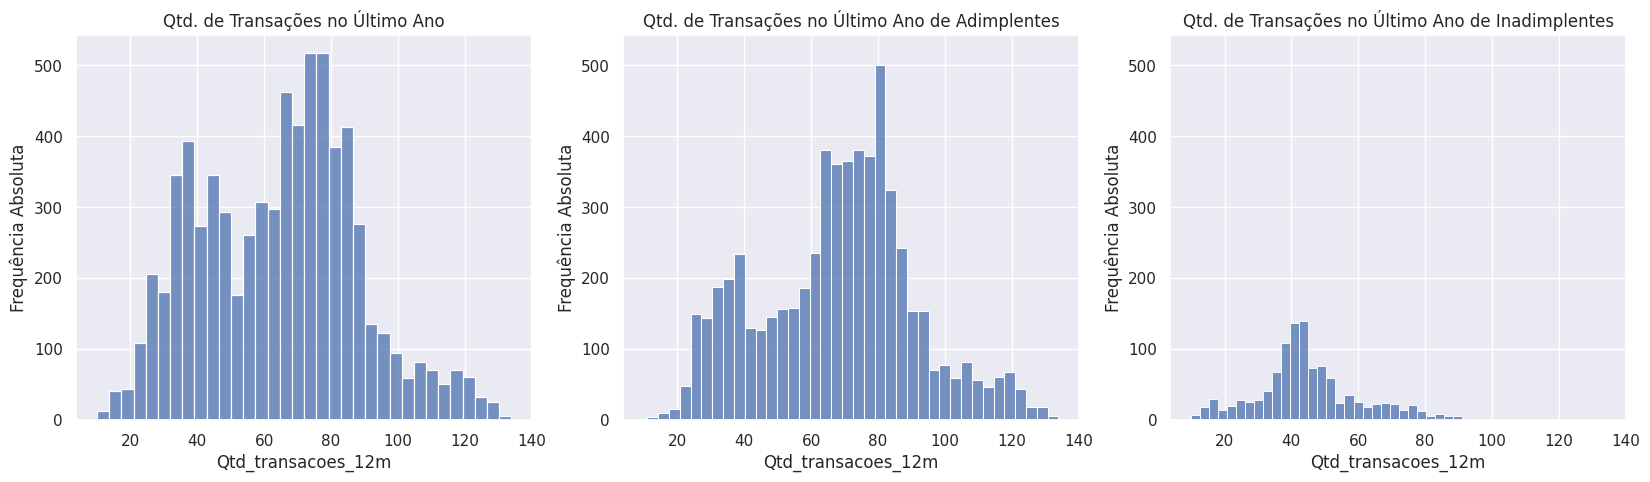

In [75]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

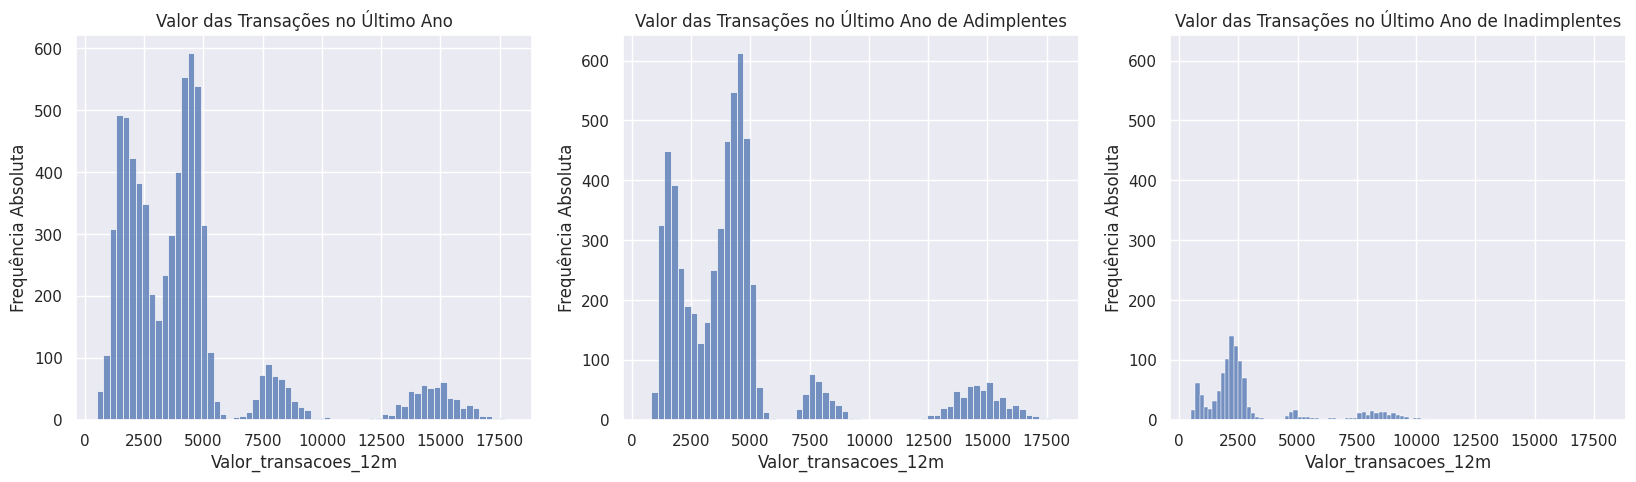

In [76]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

In [77]:
# A partir do valor de 11mil a inadimplência deixa de existir
# O valor de transações tem mais peso do que o salário anual no risco de inadimplência.

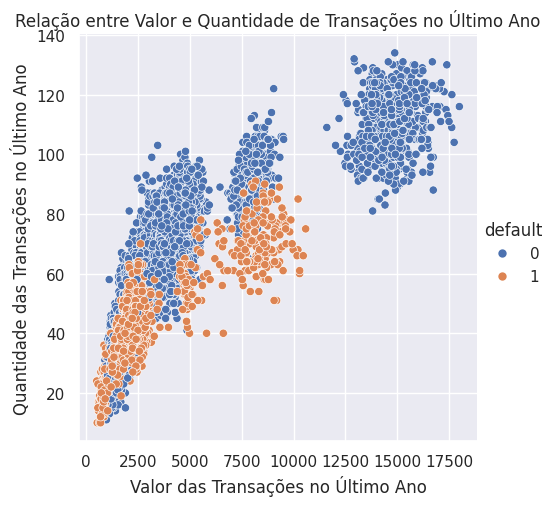

In [78]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

In [79]:
# 0 a 60 transações  entre valor de 0 a 3000 risco pesado
# de 40 a 65 transações no valor de 5000 ao ano risco pesado.
# 40 a 80 transações com valor total no ultimo ano de 5200 a 7500 risco pesado.
# 50 a 80 transações num ano e no valor entre 7500 e 10000  certamente irá virar inadimplente.
# de 80 transações a 90 com valor entre 7500 e 10000 corre grande risco de virar inadiplente
# de 40 a 6 transações no valor de 4500 a 7500 risco pesado.
# de 60 a 85 transações e com o valor de 10000 a 11000 certamente irá virar inadimplente.


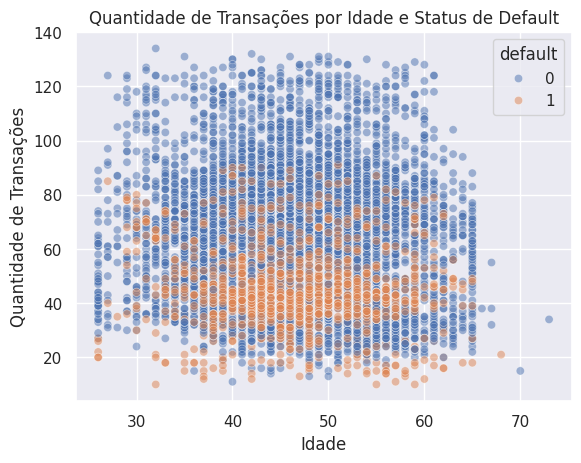

In [80]:
sns.scatterplot(data=df, x="idade", y="qtd_transacoes_12m", hue="default", alpha=0.5)
plt.title("Quantidade de Transações por Idade e Status de Default")
plt.xlabel("Idade")
plt.ylabel("Quantidade de Transações")
plt.show()


In [81]:
# com 20 mil transações e idade entre 25 a 40 anos certamente irá se tornar inadimplente
# com 20 mil transações e com idade de 50 a 62 certamente irá se tornar inadimplente
# com média de 25 anos e com 35 transações a 100 não se tornará inadimplente
# a partir de 92 transações para cima não existe risco de inadimplência independente da idade


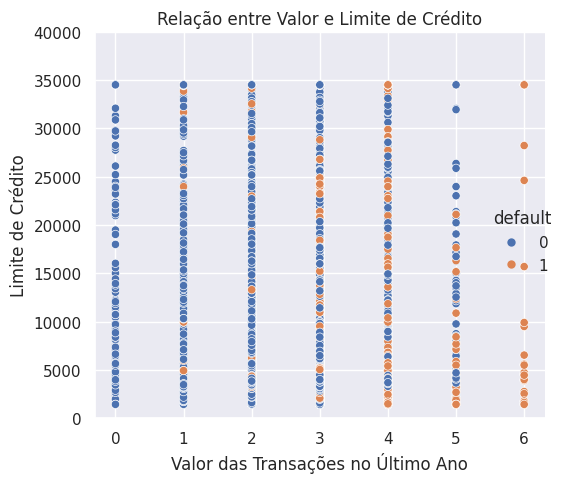

In [82]:
f = sns.relplot(x='iteracoes_12m', y='limite_credito', data=df, hue='default')

_ = f.set(
    title='Relação entre Valor e Limite de Crédito',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Limite de Crédito'
)

f.set(ylim=(0, 40000))

figura = f.fig
figura.tight_layout()
figura.show()


In [83]:
# Dificultar o aumento e disponibilidade de concessão de crédito a partir da segunda interação.

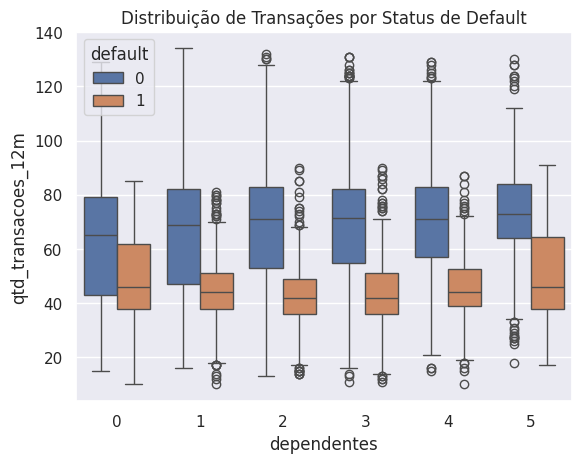

In [84]:
sns.boxplot(data=df, x="dependentes", y="qtd_transacoes_12m", hue="default")
plt.title("Distribuição de Transações por Status de Default")
plt.show()

In [85]:
# zero dependentes e com o número de transações entre 40 e 60 tendem a se tornarem inadimplentes.
# zero dependentes com 60 a 80 transações em um ano praticamente não se tornam inadimplentes.
# um dependentes e com 39 a 50 transações no ano certamente irão virar inadimplentes.
# dois, tres e quatro dependentes que fazem de 38 a 52 transações em um ano irão virar inadimplentes.
# cinco dependentes com o número de transações entre 38 e 62 irão se tornar inadimplentes.

#6. Resumo dos Insights Gerados
Com base nas análises realizadas, foram identificados os seguintes padrões e fatores de risco associados à inadimplência:

### **Resumo dos Insights Gerados**

As análises realizadas revelaram padrões importantes relacionados ao comportamento de inadimplência, destacando variáveis como estado civil, renda, número de transações, idade e dependentes. Estes insights podem guiar decisões estratégicas para mitigação de riscos em concessões de crédito:

#### **Estado Civil e Risco de Inadimplência**
Solteiros apresentam um risco ligeiramente maior de inadimplência em comparação aos casados. Esse padrão sugere que o estado civil pode ser um fator relevante na avaliação de crédito.

#### **Renda e Comportamento de Pagamento**
Para clientes com renda anual superior a R$ 11.000, o risco de inadimplência é praticamente inexistente. Esse ponto destaca que faixas de renda mais altas estão diretamente associadas a um menor risco financeiro.

#### **Transações e Impacto no Risco**
O número e o valor das transações foram identificados como fatores mais influentes no risco de inadimplência do que o salário anual. Padrões específicos incluem:

- **0 a 60 transações com valores entre R$ 0 e R$ 3.000:** Alto risco de inadimplência.
- **40 a 65 transações com valores anuais de R$ 5.000:** Alto risco.

- **40 a 80 transações com valores entre R$ 5.200 e R$ 7.500:** Risco elevado.

- **50 a 80 transações com valores entre R$ 7.500 e $ 10.000:** Alta probabilidade de inadimplência.

- **60 a 85 transações com valores entre R$ 10.000 e R$ 11.000:** Quase certeza de inadimplência.

- **Mais de 92 transações anuais:** Nenhum risco de inadimplência, independentemente da idade.

#### **Idade e Perfil de Transações**
- Clientes com **20 mil transações anuais e idades entre 25 e 40 anos ou 50 e 62 anos** têm alta probabilidade de inadimplência.
- Por outro lado, clientes com **média de 25 anos e entre 35 e 100 transações anuais** apresentam baixo risco de inadimplência.

#### **Dependentes e Relação com o Risco**
A quantidade de dependentes influencia o comportamento de inadimplência:

- **Sem dependentes:**
  - 40 a 60 transações anuais: Tendência à inadimplência.
  - 60 a 80 transações anuais: Baixo risco de inadimplência.
- **Com 1 dependente:**
  - 39 a 50 transações anuais: Alta probabilidade de inadimplência.
- **Com 2, 3 ou 4 dependentes:**
  - 38 a 52 transações anuais: Certamente inadimplentes.
- **Com 5 dependentes:**
  - 38 a 62 transações anuais: Altíssimo risco de inadimplência.

#### **Recomendações de Política de Crédito**
- **Restrição de crédito:** Aumentar a dificuldade de obtenção de crédito a partir da segunda interação, devido ao aumento expressivo no risco de inadimplência observado.
- **Monitoramento:** Observar perfis com alta frequência de transações combinada a faixas de valores específicas e múltiplos dependentes.

Esses resultados fornecem uma base sólida para ajustar políticas de crédito, priorizando a mitigação de riscos e promovendo maior estabilidade financeira para a instituição.
